In [5]:
from model import PolicyNet, list_to_tensor
import torch
from torch import distributions
from collections import deque
import numpy as np
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


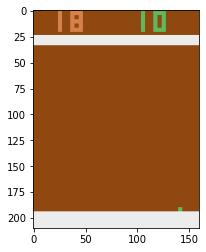

In [ ]:
env = gym.make("Pong-v0")

NFRAME = 4
NSPACE = 6
pnet = PolicyNet(NFRAME, NSPACE)
pnet.load_state_dict(torch.load("model.pt")["policy"])

obs = env.reset()
init_state = [np.zeros_like(obs)]*(NFRAME-1)
init_state.append(obs.copy())
buffer = deque(init_state, maxlen=NFRAME)

img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for _ in range(10000):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    logits, _ = pnet(list_to_tensor(buffer).unsqueeze(0))
    dist = distributions.Categorical(logits=logits)
    action = dist.sample()
    # action = env.action_space.sample()
    obs, rwd, end, _ = env.step(action)
    buffer.append(obs)